<span style="color:red">Exam Grade: 5.17</span>

  Q 1.1: 9

  Q 1.2: 9

  Q 1.3: 2

  Q 1.4: 8

  Q 1.5: 2

  Q 1.6: 1

  Global Deductions: float (0.0--10.0)

  Exam grade is average of question grades minus global deductions. 

  Grader comments: 1.1: no test!  1.2 no axis labels 1.3:  bar plot does not represent integration methods, int_trap wrong algorithm, does not execute, can not work as programmed, not trapezoidal 1.4 & 1.5: x undefined, does not execute 1.6: This statement is not based on the results presented in exam

## Midterm PHYS248/MATH248
March 2nd, 2018

Create a new directory in the top level of your own repo called `midterm`. Copy this midterm notebook into that new `midterm` directory and commit this initial version to your repo. Then keep adding answers to that notebook and commit occasionally to save your work. We will pull all repos at the end of the test and grade the version present in your repo at that time.

You may not ask the TAs any questions concerning the content of the exam. They are only allowed to help with any server or git issues.

You can use any course materials, your own past notes and work as well as any documentation of python tools that can be found on the internet. It is strictly prohibited that you communicate with anyone during the exam by any means.

### 1.1
Define the function $g(x) = a x^2 + bx +c$ for $a=-1/2$, $b=2$ and $c=1$  using the Python `lambda` construct.

In [8]:
a = -1/2; b = 2; c =1
g = lambda x: a*x**2 + b*x + c

### 1.2
Plot the function in the interval $x \in [-2,3]$.

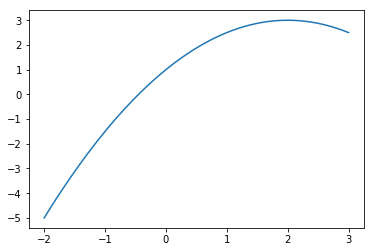

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

x_b = linspace(-2,3)
# plot
plot(x_b,g(x_b),label='polynomial')

### 1.3
Devise and implement an algorithm that integrates $g$ in the given interval using the trapezoidal rule. 
1. Start by making a bar plot that demonstrates the integration method for dividing the integration interval into $n=4$ grid zones $\Delta x$ (Riemann sum for $n=4$).
2. Create a Pyhton function called `int_trap` that takes the function name to be integrated and an x array along which the integration is to be performed as an argument and returns the area under the curve. 

In [10]:

width = 4
plt.bar(x_b, g(x_b), width, color="blue")

<Container object of 50 artists>

In [11]:
def int_trap(fct,x_b, n):
    j = 0
    for i in range(1, len(x_b)):
        j = j + 1
    h = float(x_b[j] - x_b[0]) / n
    s = 0.0
    s += h * fct(x_b[0])
    for i in range(1, n):
        s += 2.0 * h * fct(x_b[0] + i*h)
    s += h * fct(x_b[j])
    return s #returns the area summed from the trapezoids

In [12]:
int_trap(g(x_b), x_b, 4) #puts in the the function g, x array, and n

TypeError: 'numpy.ndarray' object is not callable

### 1.4
Perform the same integral using a _scipy_ library.

In [17]:
from scipy import integrate

F=integrate.cumtrapz(g(x),x)
print(F)
plot(x_b[1:],F,label='polynomial')

[-0.48964505 -0.93870326 -1.34823713 -1.71930913 -2.05298175 -2.35031747
 -2.61237877 -2.84022814 -3.03492805 -3.19754099 -3.32912944 -3.43075589
 -3.50348282 -3.5483727  -3.56648803 -3.55889128 -3.52664494 -3.47081148
 -3.3924534  -3.29263317 -3.17241328 -3.03285621 -2.87502444 -2.69998045
 -2.50878673 -2.30250576 -2.08220002 -1.84893199 -1.60376416 -1.34775901
 -1.08197902 -0.80748668 -0.52534446 -0.23661485  0.05763967  0.35635662
  0.65847351  0.96292786  1.26865719  1.57459902  1.87969086  2.18287023
  2.48307465  2.77924164  3.07030871  3.35521339  3.63289318  3.90228561
  4.1623282 ]


### 1.5 
Perform the same integral using Sympy.  Print the antiderivative and evaluate the definite integral.


In [16]:
import sympy as sp
import numpy as np
G = sp.lambdify(x, g)

g_sp = a*x**2 + b*x + c
sp.pprint(g_sp)

H = sp.integrate(g_sp, x)
sp.pprint(H)


plt.plot(x, [G(x) for i in x], color="black")
plt.show()

NameError: name 'x' is not defined

### 1.6
Comment on how the three solutions of performing this integral compare. If they are not the same comment on why this may be the case.

Answer: Each answer becomes more and more precise. You can observe as the trapezoid method cuts off some parts of the area under the curve, while scipy and sympy use much more condenced versions. In the future, using sympy would be my prefered method as its built in anylsying in more complex.

### 2.1
In the midterm directory you find a file `sunspots.txt` which contains the observed number of sunspots for each month since 1749. The file contains two columns with the month number and the sunspot number.

Load the data and make a graph of sunspot number as a function of month.  The arrays for month and number of sunspots are to be called `month` and `nr_sunsp`. Determine how many data point pairs are in the data set. 

Create a downsampled data sets `month_sparse` and `nr_sunsp_sparse` by retaining only every $15^\mathrm{th}$ data pair. In other words, keep the first data pair, then skip 14, then keep the 15th, and so on.

Plot both the down-sampled data set and the original data set for month 900 to 1700.

### 2.2
Write a function called `run_av` that calculates the running average
$$
X_k = \frac{1}{2l+1} \sum_{m=k-l}^{k+l} x_{k+m}
$$ 
The function takes as argument the array and $l$. Create month and sunspot data arrays from the original data set for $l=30$. Plot this as well in the same plot as in 2.1.

### 2.3
Perform a spline interpolation of the down-sampled data and plot it using the original month data set as the x array. Set smoothing parameter s=1. Overplot into same figure as 2.1

 Do you recognize the 11-year solar cycle? (Not a graded question ;-)